# packages

In [ ]:
%%capture
!pip install tensorflow
!pip install --upgrade shap
!pip install -q shap umap-learn lime
!pip install alibi
!pip install git+https://github.com/blent-ai/alepython.git

In [ ]:
from google.colab import files

# List of file names you want to download
file_names = ['/content/mlp_lime.html','/content/mlp_shap.png', '/content/mlp_shapVSale.png','/content/mlp_shapVlime.png']

# Download each file
for file_name in file_names:
    files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CNN

## cnn sigmoid

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Standardize features
scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

# Reshape the data for 1D Convolution
X_train1 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test1 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train1.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))

# Flatten the output
model.add(Flatten())

# Add fully connected layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train1, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test1, y_test)[1]
print(f'Accuracy: {accuracy}')


Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 1.5489 - accuracy: 0.6517 - val_loss: 1.3950 - val_accuracy: 0.6098
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1.2353 - accuracy: 0.6802 - val_loss: 1.1291 - val_accuracy: 0.6748
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1.0124 - accuracy: 0.7495 - val_loss: 0.9175 - val_accuracy: 0.7317
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8575 - accuracy: 0.7617 - val_loss: 0.8121 - val_accuracy: 0.7317
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7417 - accuracy: 0.7678 - val_loss: 0.7039 - val_accuracy: 0.7561
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.7719 - val_loss: 0.6676 - val_accuracy: 0.7480
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6312 - accuracy: 0.7882 - val_loss: 0.6264 - val_accuracy: 0.7398
Epoch 8/100


## shap

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train2)

# Explain the prediction using the KernelExplainer
shap_values = explainer.shap_values(X_test2)

20/20 [==============================] - 0s 2ms/step


  0%|          | 0/154 [00:00<?, ?it/s]

4874/4874 [==============================] - 9s 2ms/step


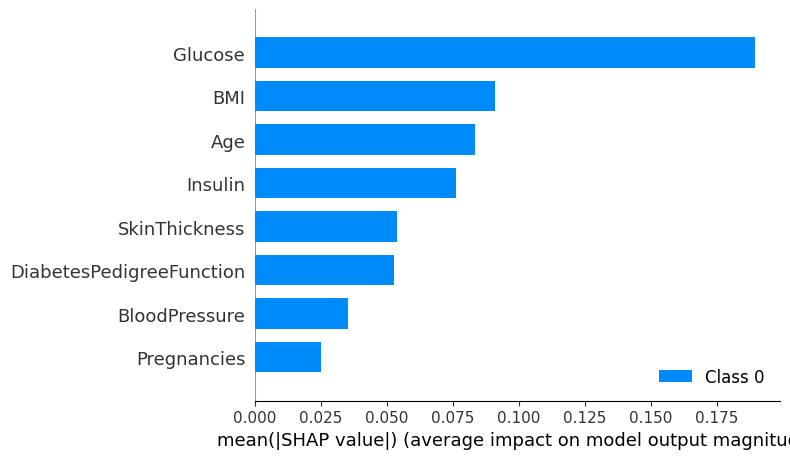

In [ ]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test2, show=False, feature_names=X.columns)
plt.savefig("cnn_shap_summary.png")
plt.show()

In [ ]:
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test2[0, :], feature_names=X.columns)
shap.save_html("cnn_shap_force_plot.html", force_plot)

## cnn softmax

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Load the diabetes dataset (replace 'diabetes.csv' with your dataset)
data = pd.read_csv('/content/diabetes.csv')

# Split data into features (X) and target (y)
columns_to_drop = ['Outcome']
X = data.drop(columns=columns_to_drop, axis=1)
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train)
X_test4 = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train4.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))

# Flatten the output
model.add(Flatten())

# Add fully connected layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Use softmax activation for multi-class classification
model.add(Dense(2, activation='softmax'))  # Assuming there are 2 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target labels
y_train4 = tf.keras.utils.to_categorical(y_train, num_classes=2)  # Adjust num_classes if needed

# Train the model
model.fit(X_train4, y_train4, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 1.5638 - accuracy: 0.5967 - val_loss: 1.4025 - val_accuracy: 0.6504
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 1.2519 - accuracy: 0.7067 - val_loss: 1.1429 - val_accuracy: 0.7480
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.7413 - val_loss: 0.9397 - val_accuracy: 0.7561
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.7699 - val_loss: 0.8067 - val_accuracy: 0.7724
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7756 - accuracy: 0.7780 - val_loss: 0.7250 - val_accuracy: 0.7805
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.7739 - val_loss: 0.6801 - val_accuracy: 0.7561
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.7699 - val_loss: 0.6510 - val_accuracy: 0.7480
Epoch 8/100


## ale

In [ ]:
# Define a predict function for your MLP model
def predict_fn(X):
    return model.predict(X)

feature_names = X.columns.tolist()
target_names = ['Not Diabetic', 'Diabetic']

5/5 [==============================] - 0s 3ms/step


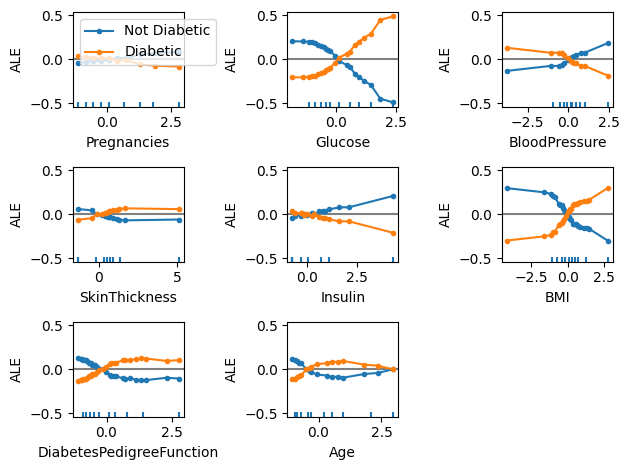

In [ ]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale

ale = ALE(predict_fn, feature_names=feature_names, target_names=target_names)
exp = ale.explain(X_test4)
plot_ale(exp)
plt.savefig("cnn_ale.png")

## lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
lime_explainer = LimeTabularExplainer( X_train4, mode="classification")

# Choose a random sample for explanation
sample_idx = 0  # Select the 1st data point

# Explain the prediction using LIME
lime_explanation = lime_explainer.explain_instance(X_test4[sample_idx], model.predict)

# Display the explanation
lime_explanation.show_in_notebook()


157/157 [==============================] - 0s 2ms/step


## shap vs lime

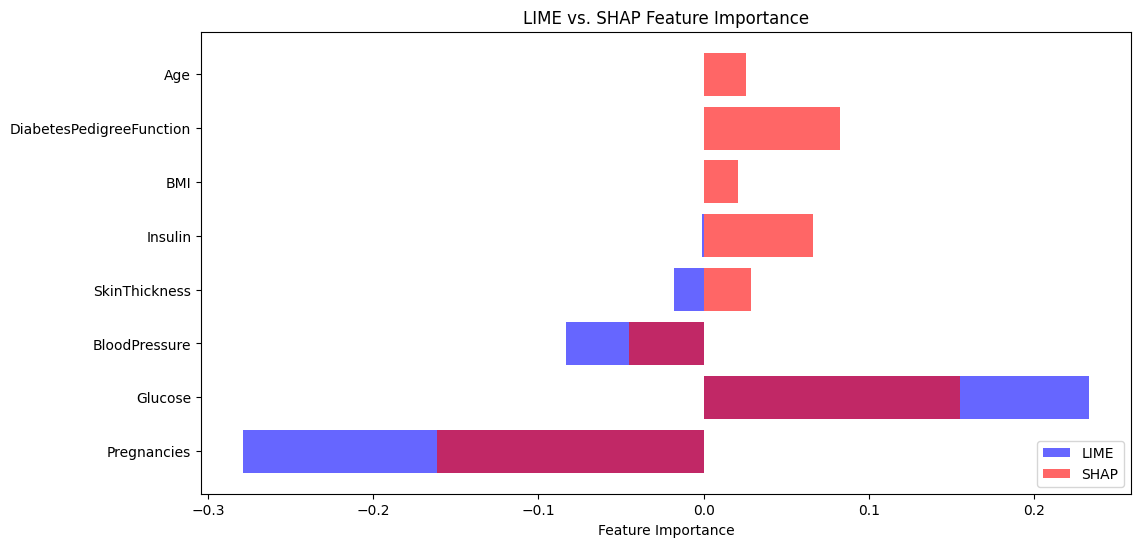

In [ ]:
feature_names = X.columns
shap_values_flattened = shap_values[0][0]

plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in lime_importance_mapped], [f[1] for f in lime_importance_mapped], color='blue', alpha=0.6, label='LIME')
plt.barh(feature_names, shap_values_flattened, color='red', alpha=0.6, label='SHAP')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.title('LIME vs. SHAP Feature Importance')
plt.legend(loc='lower right')
plt.savefig("cnn_shapVlime.png")
plt.show()

## shap vs ale for glucose

5/5 [==============================] - 0s 2ms/step


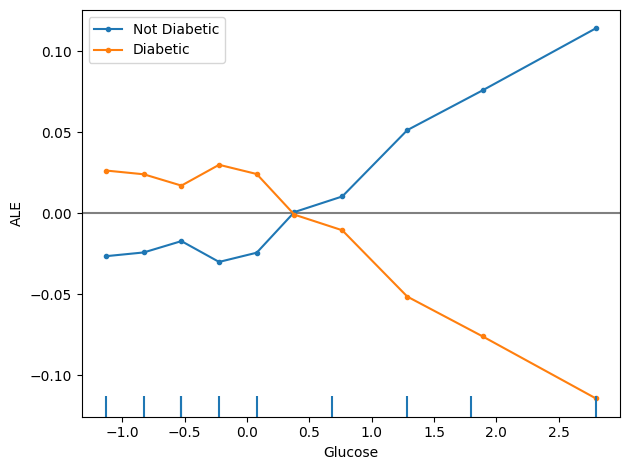

In [ ]:
Glucose_f = ['Glucose']
ale = ALE(predict_fn, feature_names= Glucose_f, target_names=target_names)
exp = ale.explain(X_test4)
plot_ale(exp)
plt.savefig("cnn_ale_glucose.png")

# MLP

## Training model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize the features (very important for neural networks)
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)

# Create an MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=5000, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train3, y_train)

# Make predictions on the test data
y_pred3 = mlp_model.predict(X_test3)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7402597402597403


## LIME (Linearity Measure) XAI

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(X_train3, mode="classification")

# Choose a random sample for explanation
sample_idx = 0  # select the 1st data point

# Explain the prediction using LIME
lime_explanation = lime_explainer.explain_instance(X_test3[sample_idx], mlp_model.predict_proba)

# Save the LIME explanation to a file
lime_explanation.save_to_file("mlp_lime.html")

## SHAP (kernel SHapley Additive exPlanations) XAI

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a KernelExplainer
explainer = shap.KernelExplainer(mlp_model.predict, X_train3)

# Explain the prediction using the KernelExplainer
shap_values = explainer.shap_values(X_test3)

  0%|          | 0/154 [00:00<?, ?it/s]

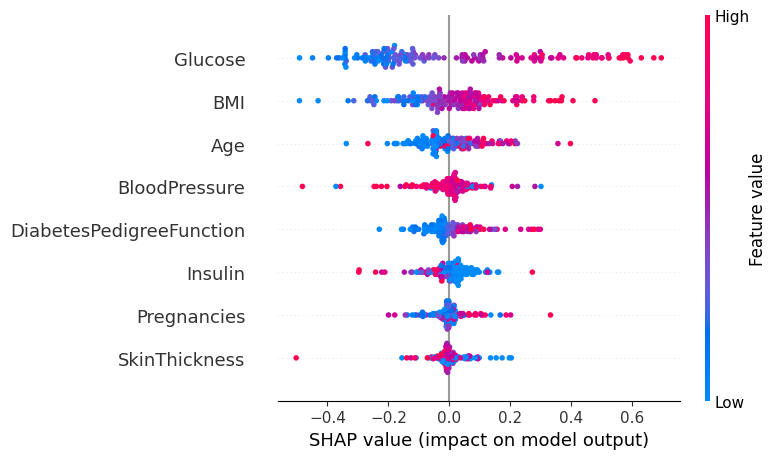

In [ ]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test, show=False, feature_names=X.columns)
plt.savefig("mlp_shap.png")
plt.show()

## ALE (Accumulated Local Effects) XAI

In [ ]:
# Define a predict function for your MLP model
def predict_fn(X):
    return mlp_model.predict_proba(X)

feature_names = X.columns.tolist()
target_names = ['Not Diabetic', 'Diabetic']

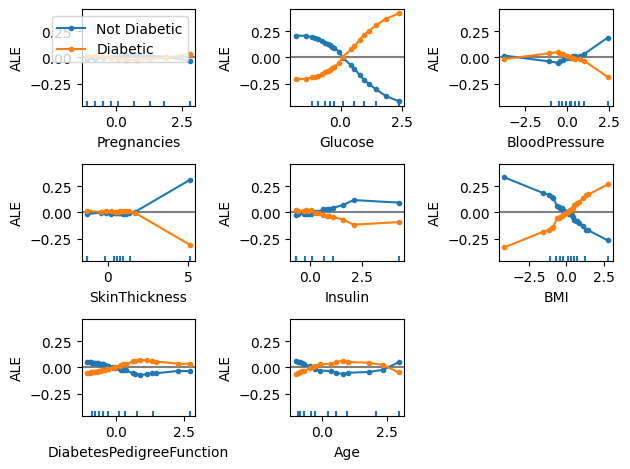

In [ ]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale

ale = ALE(predict_fn, feature_names=feature_names, target_names=target_names)
exp = ale.explain(X_test3)
plot_ale(exp)
plt.savefig("mlp_ale.png")

## comparing SHAP and LIME

In [ ]:
lime_importance = lime_explanation.as_list()

def parse_lime_explanation(lime_values):
    parsed_values = []
    for lime_val in lime_values:
        feature_range, coefficient = lime_val
        parts = feature_range.split()
        try:
            feature_index = int(parts[0])
        except ValueError:
            feature_index = None
        if feature_index is not None:
            parsed_values.append((feature_names[feature_index], coefficient))
    return parsed_values
feature_names = X.columns
lime_importance_mapped = parse_lime_explanation(lime_importance)
print(lime_importance_mapped)


[('Glucose', -0.2659125885162101), ('Age', 0.11848797302407692), ('BloodPressure', 0.05168587133372465), ('SkinThickness', 0.02690503056922421)]


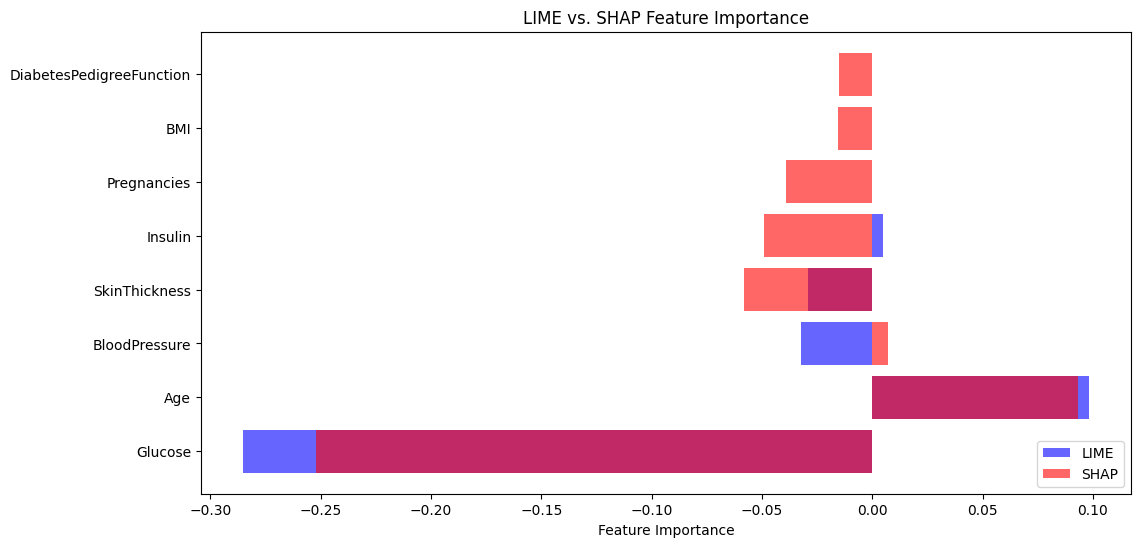

In [ ]:
# Plot LIME and SHAP explanations
plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in lime_importance_mapped], [f[1] for f in lime_importance_mapped], color='blue', alpha=0.6, label='LIME')
plt.barh(X.columns, shap_values[0], color='red', alpha=0.6, label='SHAP')
plt.xlabel('Feature Importance')
plt.title('LIME vs. SHAP Feature Importance')
plt.legend(loc='lower right')
plt.savefig("mlp_shapVlime.png")
plt.show()

## Comparing ALE and SHAP (for Glucose)

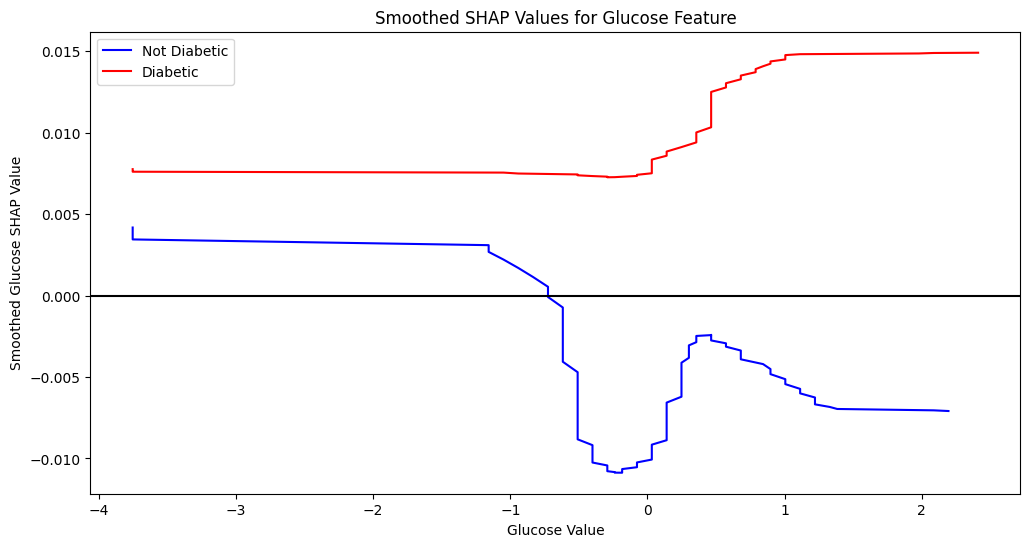

In [ ]:
from scipy.ndimage import gaussian_filter1d

y_test_df = pd.DataFrame(y_test, columns=['Outcome'])
y_test_df.reset_index(drop=True, inplace=True)

# Create empty lists to store the data for output 0 and 1
glucose_values_0 = []
glucose_shap_values_0 = []
glucose_values_1 = []
glucose_shap_values_1 = []

# Loop through the data and separate based on output value
for i in range(len(X_test3)):
    if y_test_df.iloc[i,0]==0:
        glucose_values_0.append(X_test3[i][2])
        glucose_shap_values_0.append(shap_values[i][0])
    else:
        glucose_values_1.append(X_test3[i][2])
        glucose_shap_values_1.append(shap_values[i][0])

# Sort the data by Glucose values
sorted_indices_0 = np.argsort(glucose_values_0)
sorted_glucose_0 = [glucose_values_0[i] for i in sorted_indices_0]
sorted_shap_0 = [glucose_shap_values_0[i] for i in sorted_indices_0]
sorted_indices_1 = np.argsort(glucose_values_1)
sorted_glucose_1 = [glucose_values_1[i] for i in sorted_indices_1]
sorted_shap_1 = [glucose_shap_values_1[i] for i in sorted_indices_1]

# Apply Gaussian filter to your SHAP values
smoothed_shap_0 = gaussian_filter1d(sorted_shap_0, sigma=15)
smoothed_shap_1 = gaussian_filter1d(sorted_shap_1, sigma=15)

# Create two line plots with smoothed data
plt.figure(figsize=(12, 6))
plt.plot(sorted_glucose_0, smoothed_shap_0, label='Not Diabetic', color='blue')
plt.plot(sorted_glucose_1, smoothed_shap_1, label='Diabetic', color='red')
plt.axhline(y=0, color='black', linestyle='-')

plt.xlabel("Glucose Value")
plt.ylabel("Smoothed Glucose SHAP Value")
plt.title("Smoothed SHAP Values for Glucose Feature")
plt.legend()
plt.savefig("mlp_shapVSale.png")
plt.show()

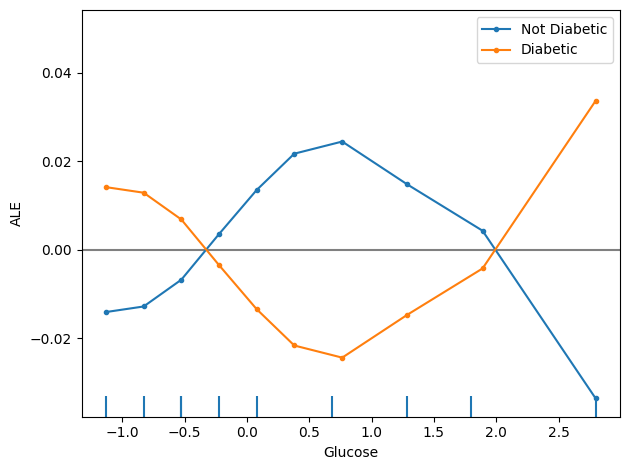

In [ ]:
Glucose_f = ['Glucose']
ale = ALE(predict_fn, feature_names= Glucose_f, target_names=target_names)
exp = ale.explain(X_test3)
plot_ale(exp)
plt.savefig("mlp_aleVSshap.png")

# regression

## training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from lime.lime_tabular import LimeTabularExplainer

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 0.17119610389610387
R-squared (R2): 0.25434585858585845


## lime

In [ ]:
# Create a LIME explainer
lime_explainer = LimeTabularExplainer(X_train.values, mode="regression")

# Choose a random sample for explanation
sample_idx = 0  # Select the 1st data point or any other index
sample = X_test.iloc[sample_idx]  # Use .iloc to access the sample

# Explain the prediction using LIME
lime_explanation = lime_explainer.explain_instance(sample, rf_regressor.predict, num_features=5)

# # Display the explanation
# lime_explanation.show_in_notebook()

# Save the LIME explanation to a file
lime_explanation.save_to_file("REGRESSION_lime.html")

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


## shap

In [ ]:
# Create a SHAP explainer using the kernel explainer
explainer = shap.KernelExplainer(rf_regressor.predict, X)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

  0%|          | 0/768 [00:00<?, ?it/s]

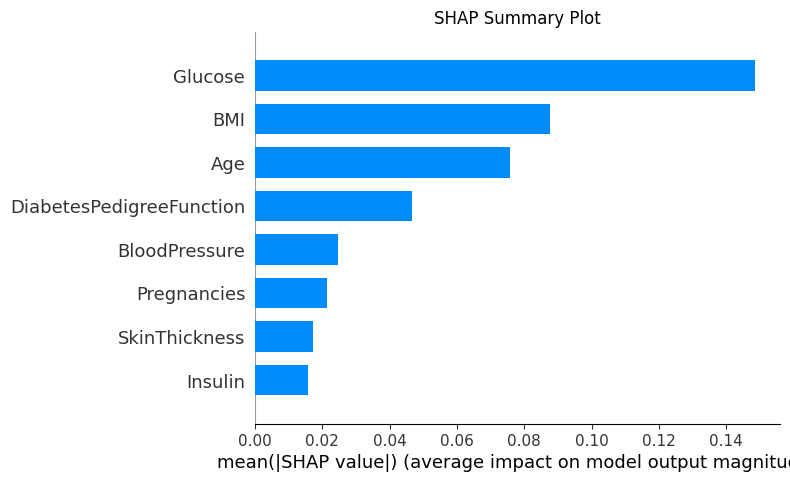

In [ ]:
# Create a summary plot
shap.summary_plot(shap_values, X, plot_type='bar', show=False)
plt.title("SHAP Summary Plot")
plt.savefig("RF_shap_summary.png")
plt.show()

In [ ]:
# Choose a random sample for the force plot
sample_idx = 0  # Select the 1st data point or any other index
sample = X.iloc[sample_idx]

# Create a force plot
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[sample_idx], sample, show=True)
shap.save_html("RF_shap_force.html", force_plot)

## ALE

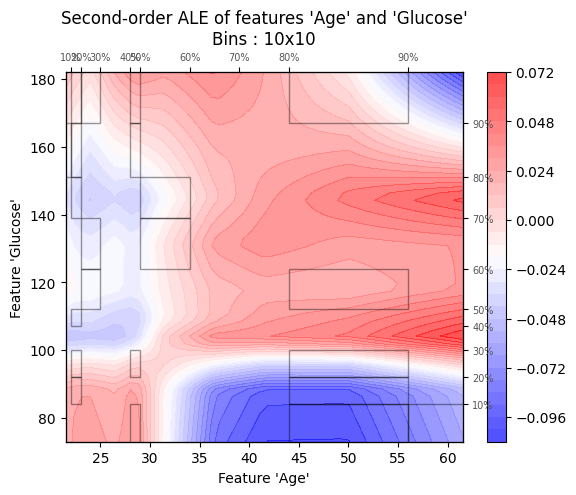

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from alepython.ale import ale_plot
import matplotlib.pyplot as plt

feature_names = ['Age', 'Glucose']

# Create the ALE plot
ale_plot(rf_regressor, X_test, features=feature_names)
# Show the ALE plot
plt.show()

## LIME vs SHAP

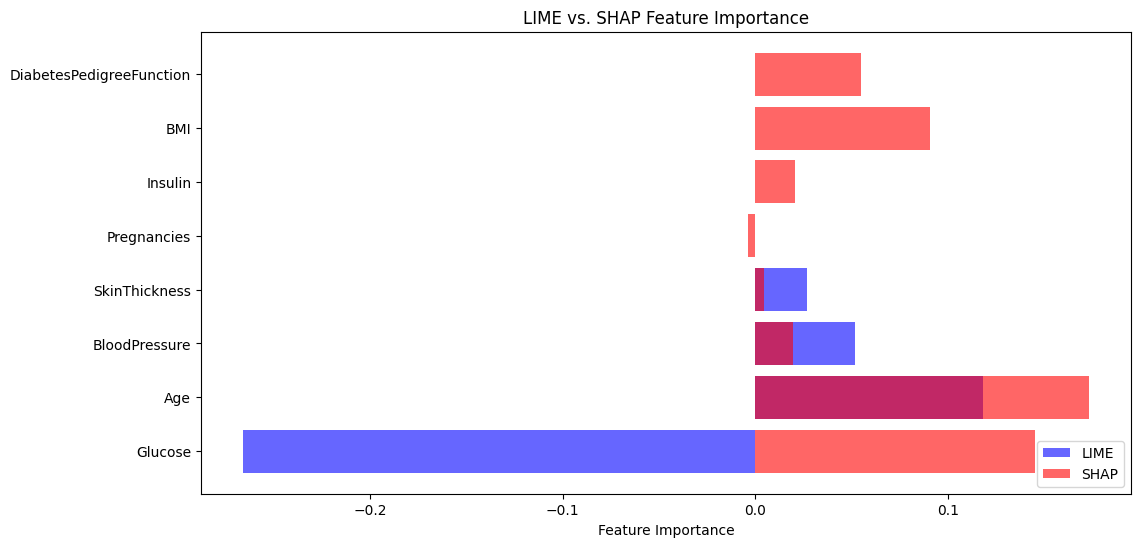

In [ ]:
# Plot LIME and SHAP explanations
plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in lime_importance_mapped], [f[1] for f in lime_importance_mapped], color='blue', alpha=0.6, label='LIME')
plt.barh(X.columns, shap_values[0], color='red', alpha=0.6, label='SHAP')
plt.xlabel('Feature Importance')
plt.title('LIME vs. SHAP Feature Importance')
plt.legend(loc='lower right')
plt.savefig("RF_shapVlime.png")
plt.show()

# RNN

## training sigmoid

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


# Standardize features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train)
X_test6 = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add a SimpleRNN layer with return_sequences=True for stacking RNN layers
model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train6.shape[1], 1)))
model.add(Dropout(0.2))

# Add another SimpleRNN layer
model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# Add a final SimpleRNN layer
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dropout(0.2))

# Add a fully connected layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data to match the RNN input shape
X_train6 = X_train6.reshape(X_train6.shape[0], X_train6.shape[1], 1)
X_test6 = X_test6.reshape(X_test6.shape[0], X_test6.shape[1], 1)

# Train the model
model.fit(X_train6, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test6, y_test)[1]
print(f'Accuracy: {accuracy}')


Epoch 1/100
16/16 [==============================] - 2s 25ms/step - loss: 0.5826 - accuracy: 0.7088 - val_loss: 0.4633 - val_accuracy: 0.7480
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5205 - accuracy: 0.7393 - val_loss: 0.4911 - val_accuracy: 0.7642
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.7739 - val_loss: 0.4831 - val_accuracy: 0.7398
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4877 - accuracy: 0.7576 - val_loss: 0.4685 - val_accuracy: 0.7724
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5099 - accuracy: 0.7637 - val_loss: 0.4644 - val_accuracy: 0.7317
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4948 - accuracy: 0.7760 - val_loss: 0.4627 - val_accuracy: 0.7724
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4778 - accuracy: 0.7678 - val_loss: 0.4753 - val_accuracy: 0.7317
Epoch 8/100


## shap

In [ ]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train2)

# Explain the prediction using the KernelExplainer
shap_values = explainer.shap_values(X_test)

20/20 [==============================] - 0s 2ms/step


  0%|          | 0/154 [00:00<?, ?it/s]

4874/4874 [==============================] - 10s 2ms/step


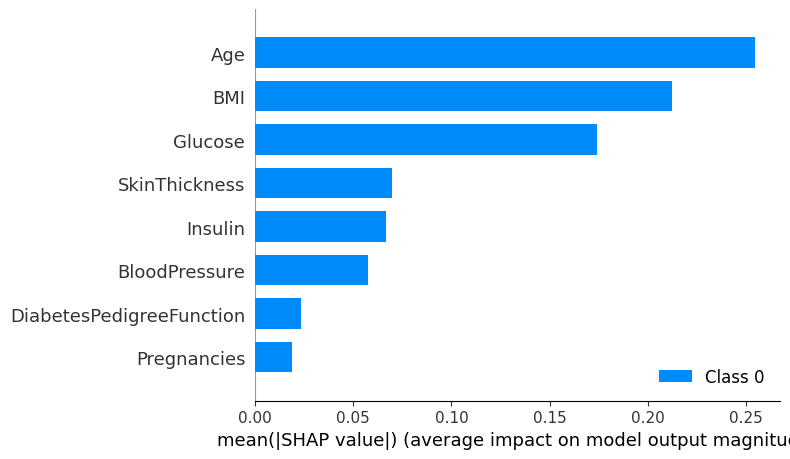

In [ ]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test2, show=False, feature_names=X.columns)
plt.savefig("rnn_shap_summary.png")
plt.show()

In [ ]:
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test2[0, :], feature_names=X.columns)
shap.save_html("rnn_shap_force_plot.html", force_plot)

## training softmax

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Standardize features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train)
X_test6 = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add a SimpleRNN layer with return_sequences=True for stacking RNN layers
model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train6.shape[1], 1)))
model.add(Dropout(0.2))

# Add another SimpleRNN layer
model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# Add a final SimpleRNN layer
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dropout(0.2))

# Add a fully connected layer with softmax activation for binary classification
model.add(Dense(units=2, activation='softmax'))  # Assuming there are 2 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)  # Adjust num_classes if needed

# Reshape the input data to match the RNN input shape
X_train6 = X_train6.reshape(X_train6.shape[0], X_train6.shape[1], 1)
X_test6 = X_test6.reshape(X_test6.shape[0], X_test6.shape[1], 1)

# Train the model
model.fit(X_train6, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 3s 26ms/step - loss: 0.6058 - accuracy: 0.7108 - val_loss: 0.5455 - val_accuracy: 0.7561
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5463 - accuracy: 0.7332 - val_loss: 0.5099 - val_accuracy: 0.7154
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5313 - accuracy: 0.7454 - val_loss: 0.4933 - val_accuracy: 0.7724
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5370 - accuracy: 0.7393 - val_loss: 0.4811 - val_accuracy: 0.7317
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4890 - accuracy: 0.7780 - val_loss: 0.4996 - val_accuracy: 0.7398
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5282 - accuracy: 0.7373 - val_loss: 0.4910 - val_accuracy: 0.7236
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4914 - accuracy: 0.7821 - val_loss: 0.4988 - val_accuracy: 0.7398
Epoch 8/100


## Lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
lime_explainer = LimeTabularExplainer( X_train4, mode="classification")

# Choose a random sample for explanation
sample_idx = 0  # Select the 1st data point

# Explain the prediction using LIME
lime_explanation = lime_explainer.explain_instance(X_test4[sample_idx], model.predict)

# Save the LIME explanation to a file
lime_explanation.save_to_file("rnn_lime.html")

157/157 [==============================] - 0s 3ms/step


## ALE

In [ ]:
# Define a predict function for your MLP model
def predict_fn(X):
    return model.predict(X)

feature_names = X.columns.tolist()
target_names = ['Not Diabetic', 'Diabetic']

5/5 [==============================] - 0s 3ms/step


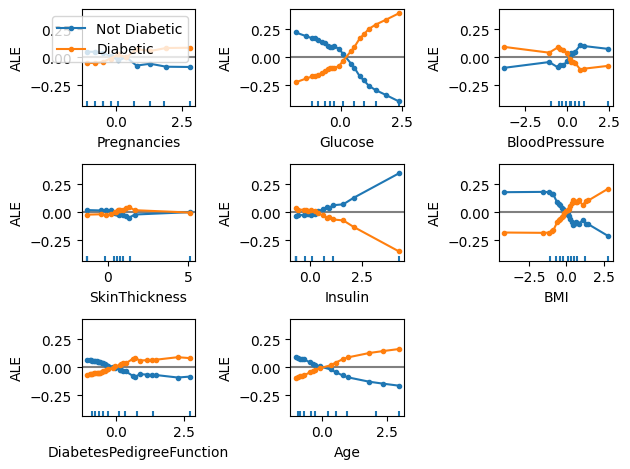

In [ ]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale

ale = ALE(predict_fn, feature_names=feature_names, target_names=target_names)
exp = ale.explain(X_test4)
plot_ale(exp)
plt.savefig("rnn_ale.png")

5/5 [==============================] - 0s 3ms/step


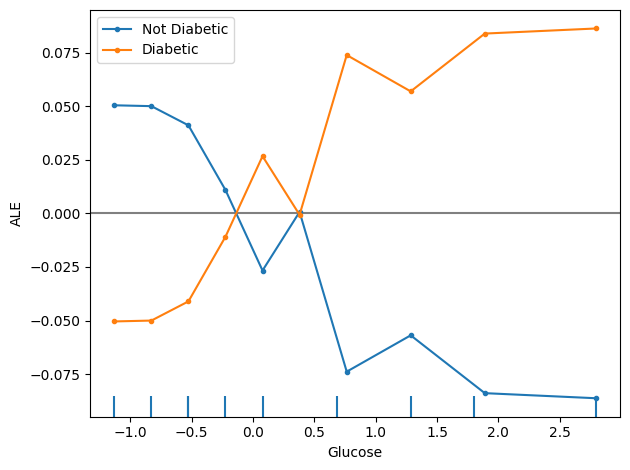

In [ ]:
Glucose_f = ['Glucose']
ale = ALE(predict_fn, feature_names= Glucose_f, target_names=target_names)
exp = ale.explain(X_test4)
plot_ale(exp)
plt.savefig("rnn_ale_glucose.png")

## lime vs shap

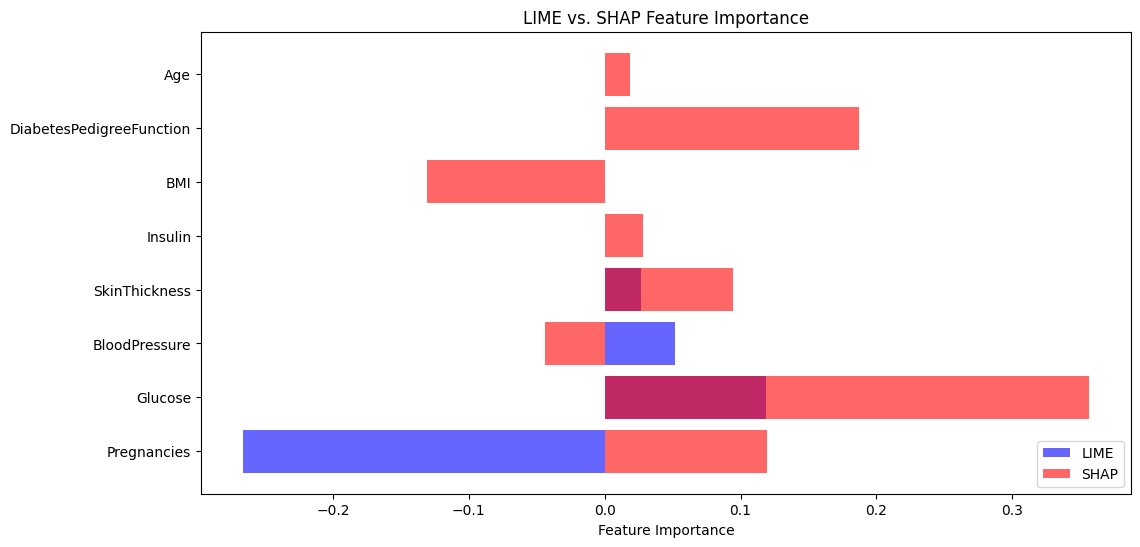

In [ ]:
feature_names = X.columns
shap_values_flattened = shap_values[0][0]

plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in lime_importance_mapped], [f[1] for f in lime_importance_mapped], color='blue', alpha=0.6, label='LIME')
plt.barh(feature_names, shap_values_flattened, color='red', alpha=0.6, label='SHAP')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.title('LIME vs. SHAP Feature Importance')
plt.legend(loc='lower right')
plt.savefig("rnn_shapVlime.png")
plt.show()